<a href="https://colab.research.google.com/github/DavidC0126/Airbox-Implementation-and-Data-Analysis/blob/main/house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm
% matplotlib inline
import io
from google.colab import files


In [ ]:
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
# load data
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [ ]:
# concate train/test data
data_all = pd.concat((data_train, data_test), 
                     sort=False).reset_index(drop=True)

In [ ]:
# numeric feature describe
num_data=data_all.select_dtypes(['int64','float64'])
describe_num=data_all.describe().transpose()
print (describe_num)

                count           mean  ...       75%       max
Id             2919.0    1460.000000  ...    2189.5    2919.0
MSSubClass     2919.0      57.137718  ...      70.0     190.0
LotFrontage    2433.0      69.305795  ...      80.0     313.0
LotArea        2919.0   10168.114080  ...   11570.0  215245.0
OverallQual    2919.0       6.089072  ...       7.0      10.0
OverallCond    2919.0       5.564577  ...       6.0       9.0
YearBuilt      2919.0    1971.312778  ...    2001.0    2010.0
YearRemodAdd   2919.0    1984.264474  ...    2004.0    2010.0
MasVnrArea     2896.0     102.201312  ...     164.0    1600.0
BsmtFinSF1     2918.0     441.423235  ...     733.0    5644.0
BsmtFinSF2     2918.0      49.582248  ...       0.0    1526.0
BsmtUnfSF      2918.0     560.772104  ...     805.5    2336.0
TotalBsmtSF    2918.0    1051.777587  ...    1302.0    6110.0
1stFlrSF       2919.0    1159.581706  ...    1387.5    5095.0
2ndFlrSF       2919.0     336.483727  ...     704.0    2065.0
LowQualF

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


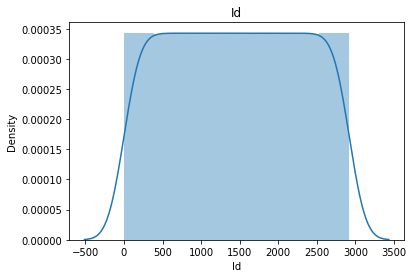

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


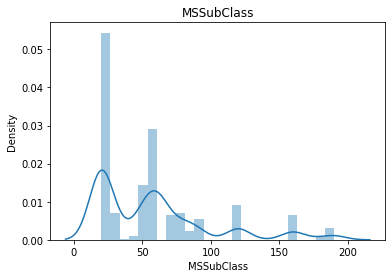

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


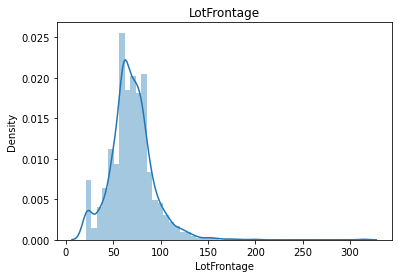

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


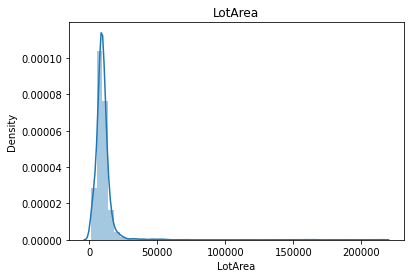

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


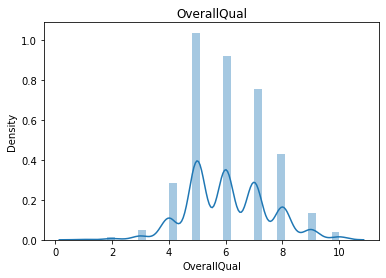

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


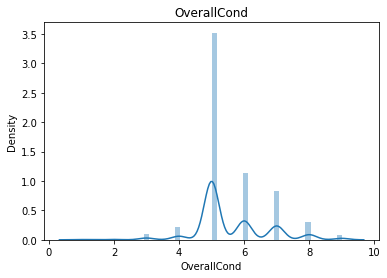

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


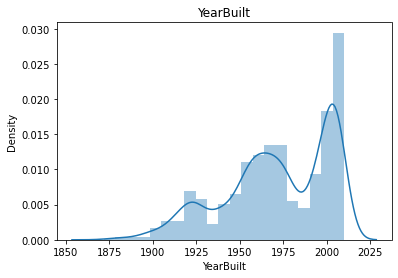

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


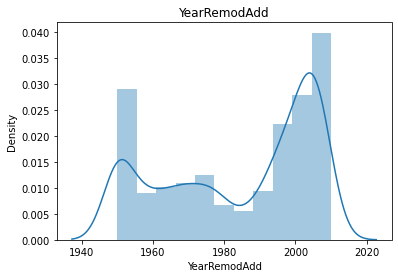

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


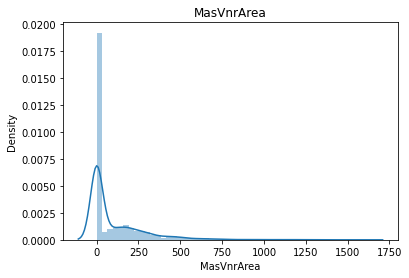

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


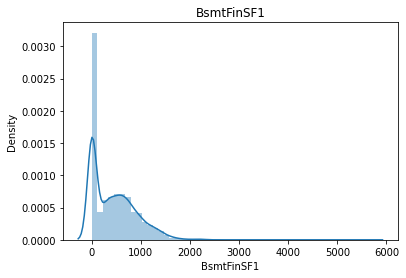

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


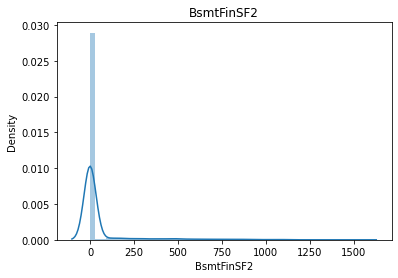

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


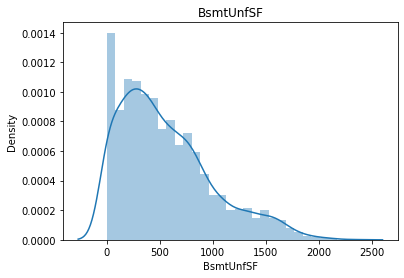

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


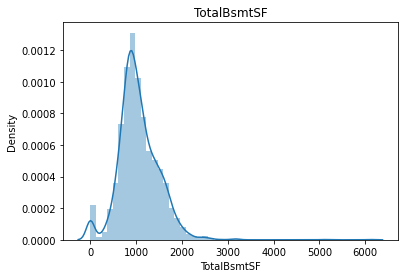

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


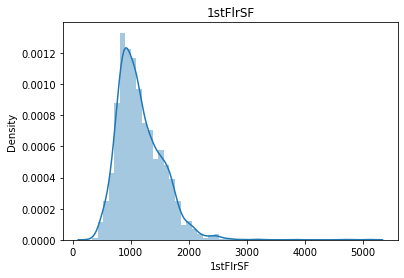

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


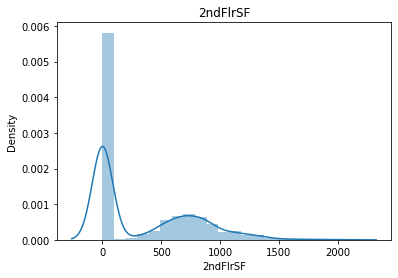

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


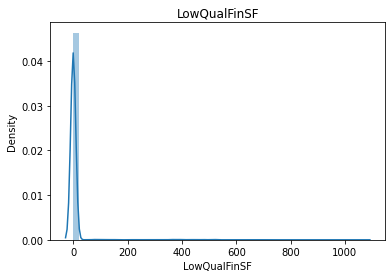

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


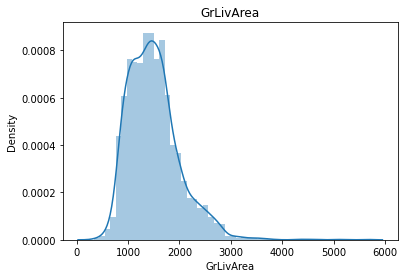

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


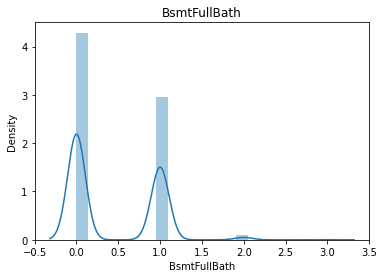

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


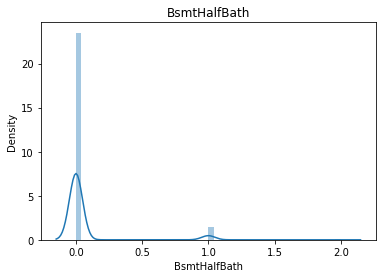

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


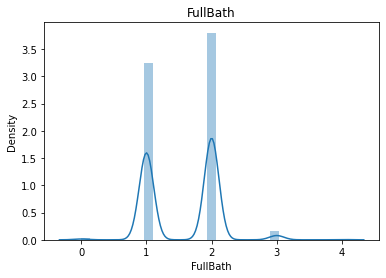

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


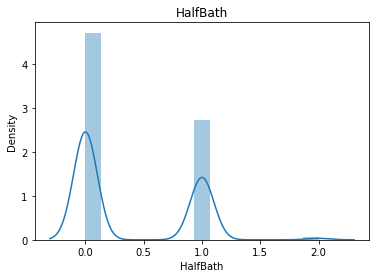

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


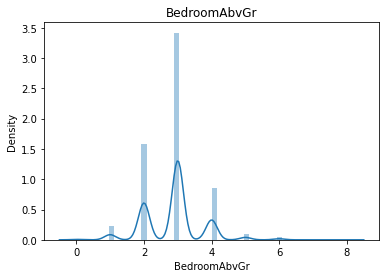

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


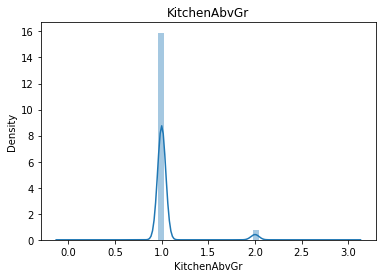

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


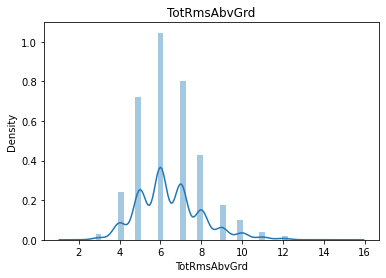

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


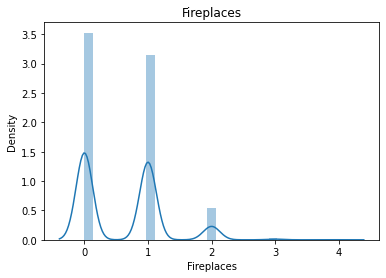

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


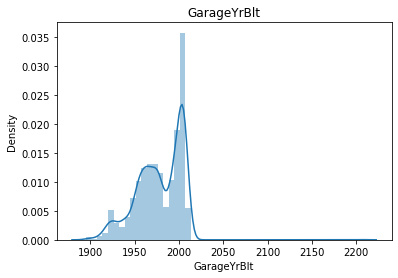

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


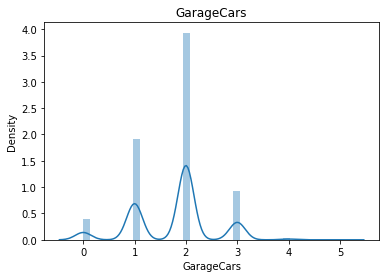

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


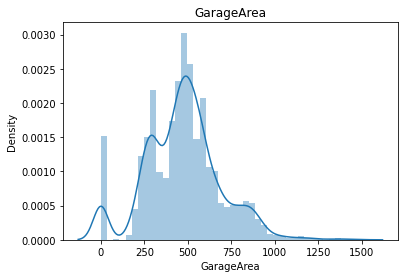

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


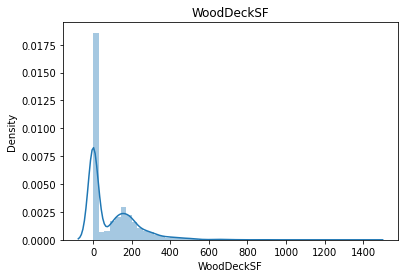

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


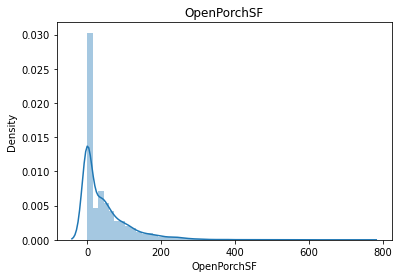

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


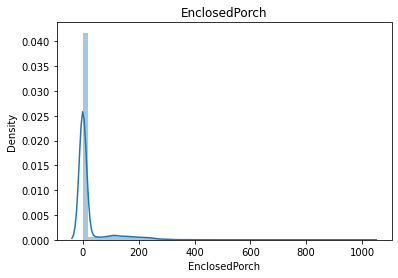

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


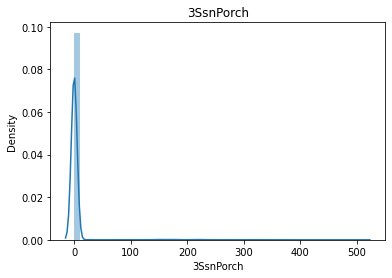

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


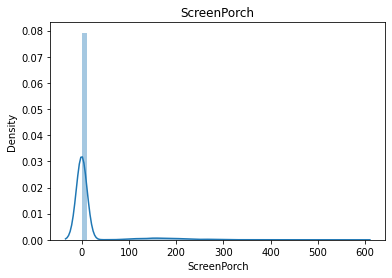

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


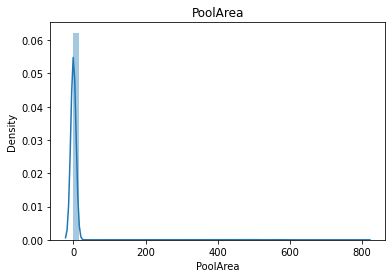

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


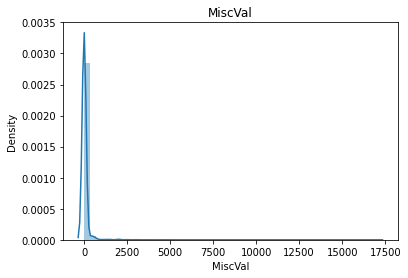

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


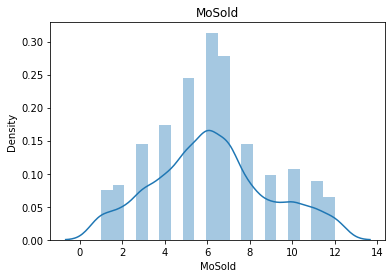

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


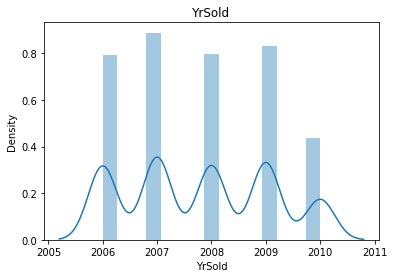

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


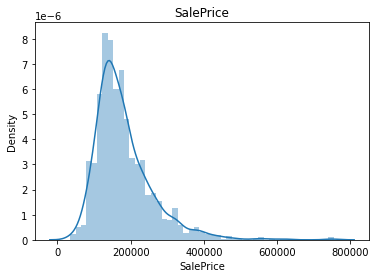

In [ ]:
# KDE-all
for i in list(num_data.columns):
    sns.distplot(num_data[i].dropna()).set_title(i)
    plt.show()

Text(0.5, 1.0, 'correlation colormap')

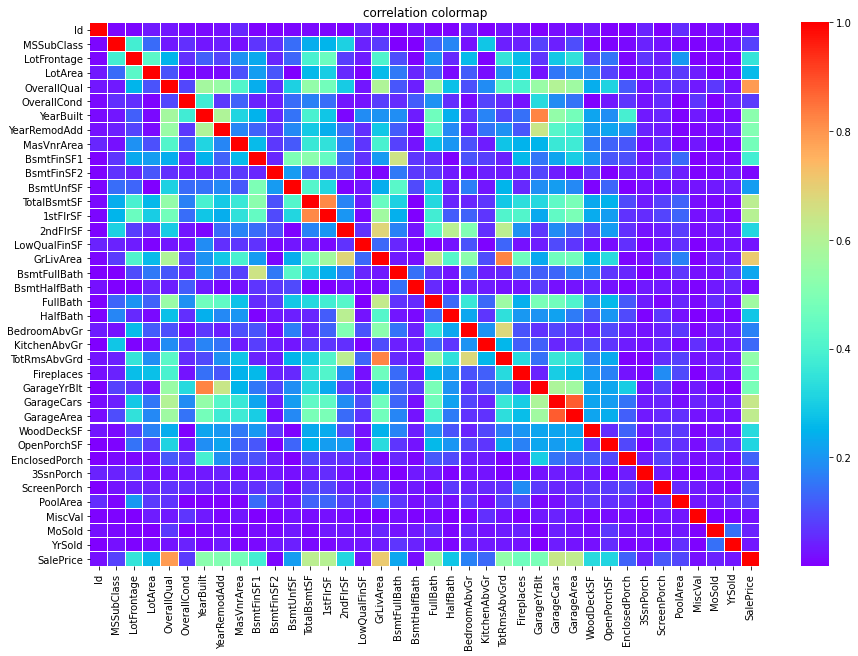

In [ ]:
#correlation matrix
corr_matrix = data_train.corr().abs()
plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, linewidths = 0.05, cmap='rainbow')
ax.set_title('correlation colormap')

(array([0.5]), <a list of 1 Text major ticklabel objects>)

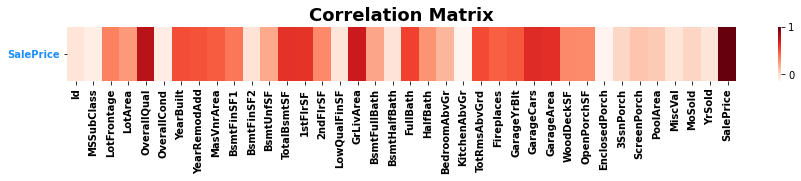

In [ ]:
# correlation heatmap
num_train=data_train.select_dtypes(['int64','float64'])
num_corr=num_train.corr().drop('Id')    
fig,ax=plt.subplots(figsize=(15,1))
sns.heatmap(num_corr.sort_values(by=['SalePrice'], ascending=False).head(1), cmap='Reds')
plt.title("Correlation Matrix", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)

In [ ]:
# top 10 
print (num_corr['SalePrice'].sort_values(ascending=False).iloc[1:11])

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


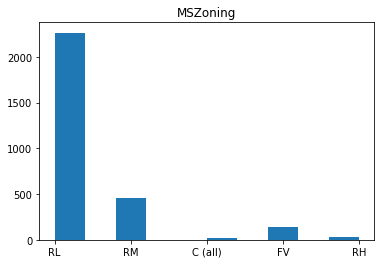

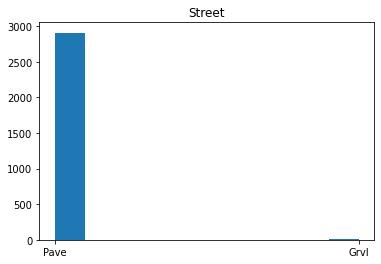

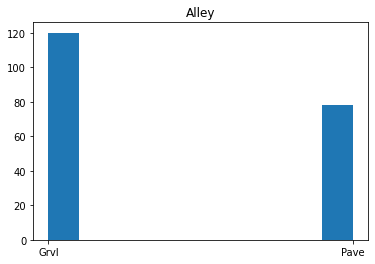

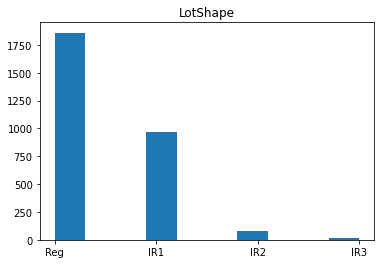

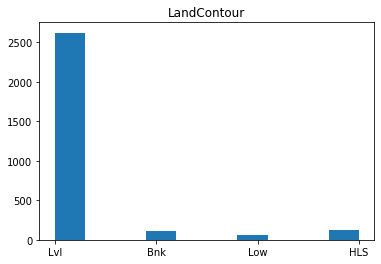

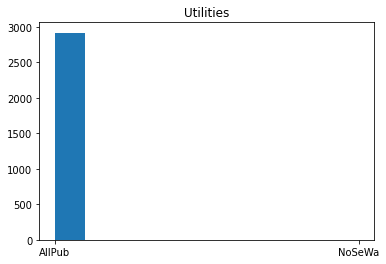

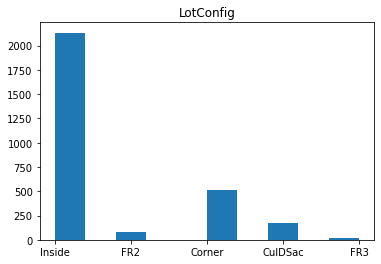

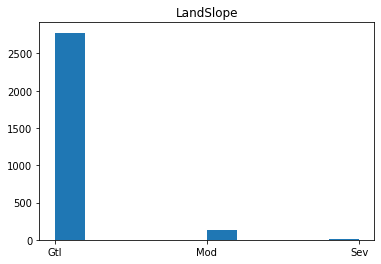

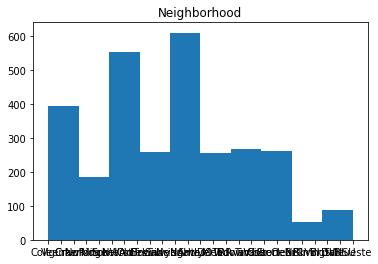

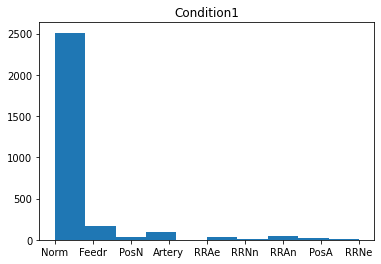

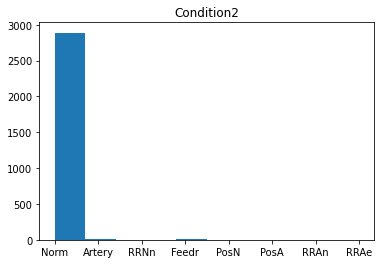

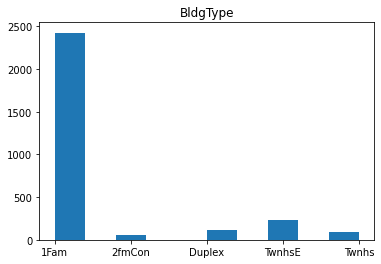

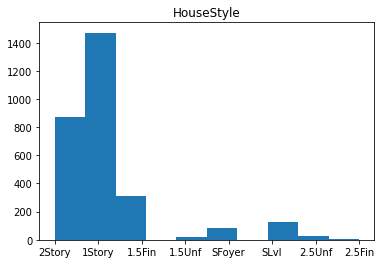

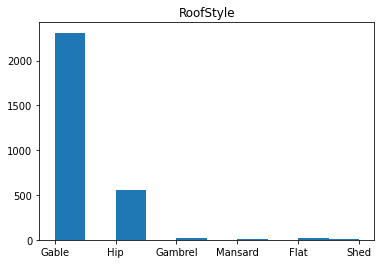

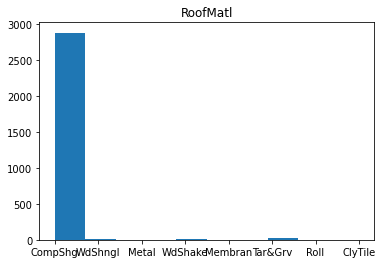

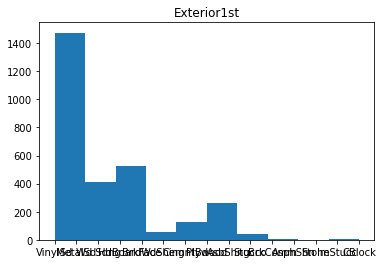

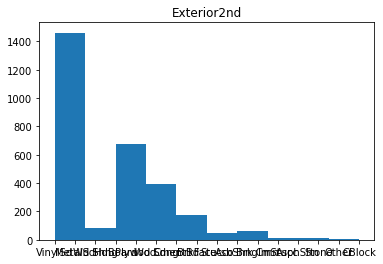

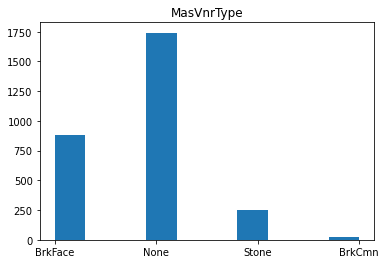

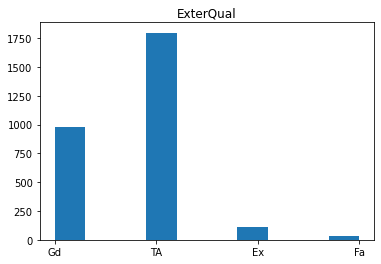

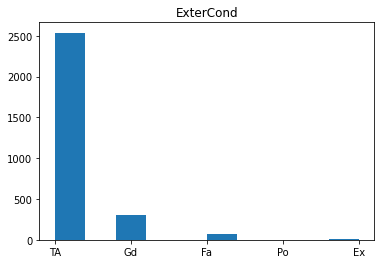

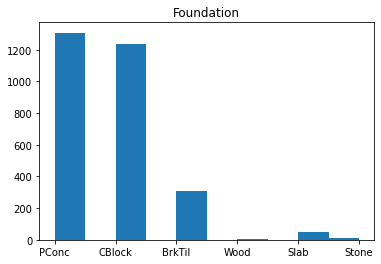

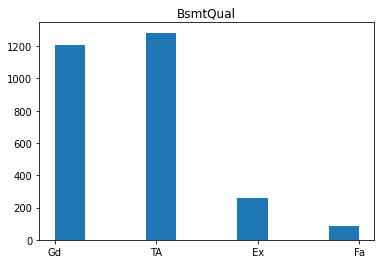

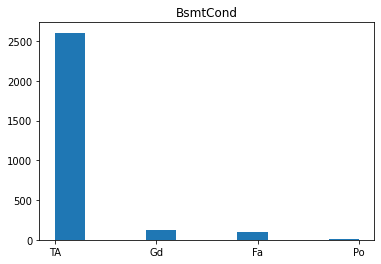

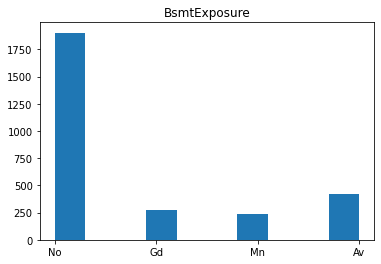

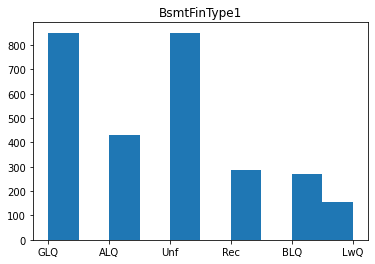

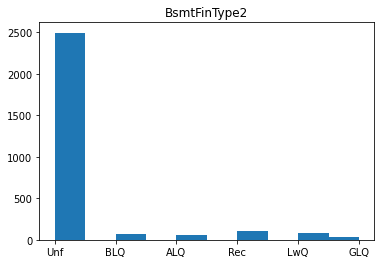

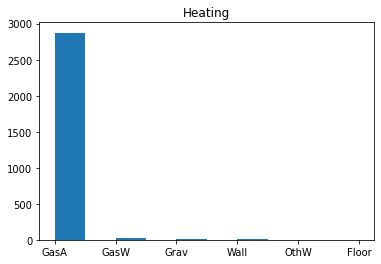

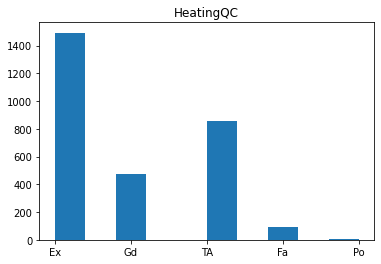

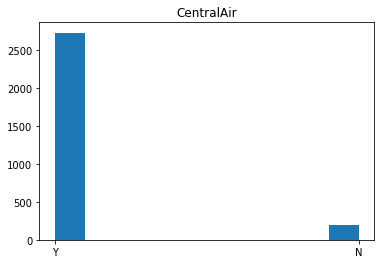

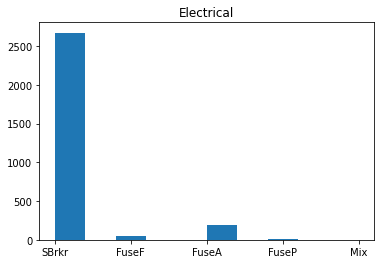

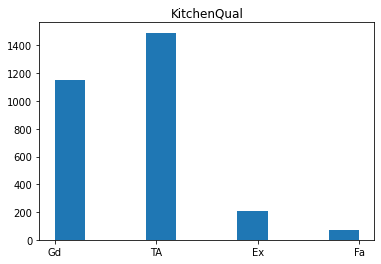

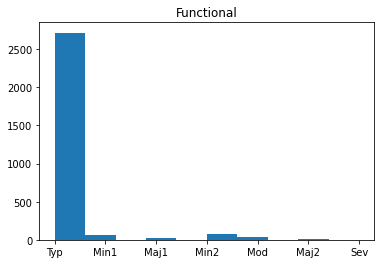

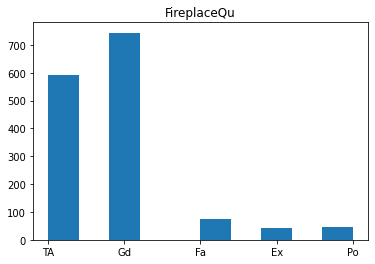

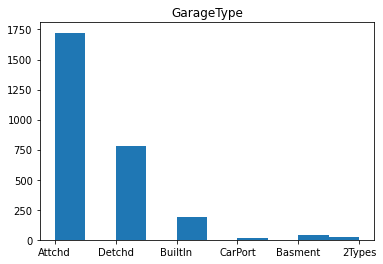

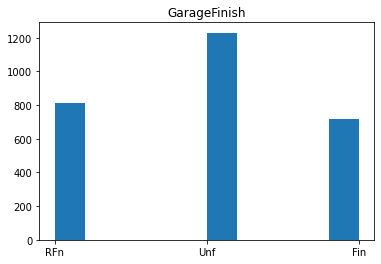

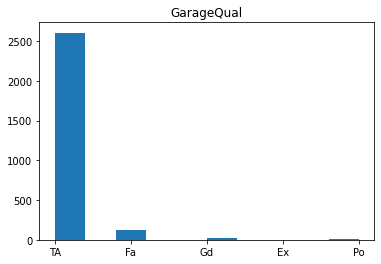

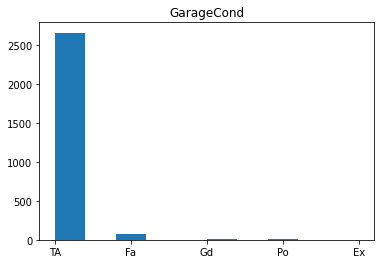

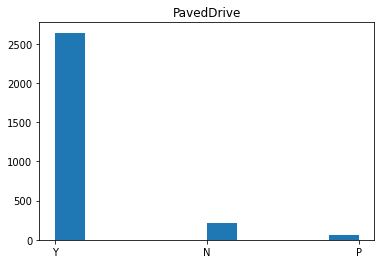

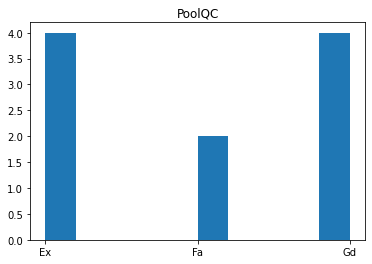

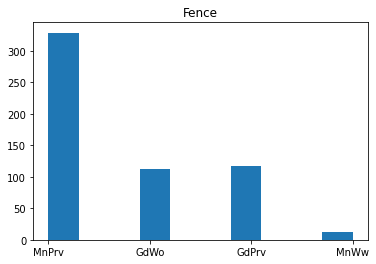

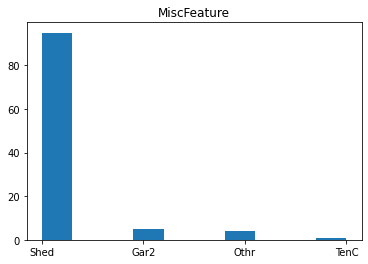

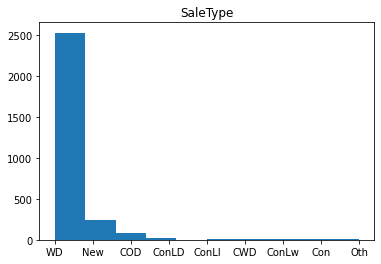

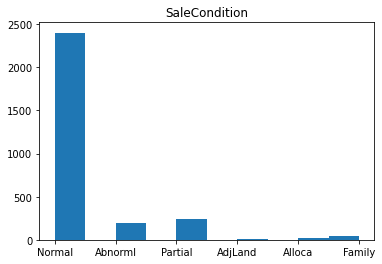

In [ ]:
# 特徵描述-類別
cat_data=data_all.select_dtypes(['object'])
for i in list(cat_data.columns):
    fig,ax=plt.subplots(1,1) 
    ax.hist(cat_data[i].dropna())
    ax.set_title(i,fontsize=12,color='Black')
    plt.show()

In [ ]:
# 遺漏值檢查
missing_columns=data_all.isnull().mean().sort_values(ascending=False)
missing_columns=missing_columns[missing_columns!=0].to_frame().reset_index()
print(missing_columns)


           index         0
0         PoolQC  0.996574
1    MiscFeature  0.964029
2          Alley  0.932169
3          Fence  0.804385
4      SalePrice  0.499829
5    FireplaceQu  0.486468
6    LotFrontage  0.166495
7     GarageQual  0.054471
8    GarageYrBlt  0.054471
9   GarageFinish  0.054471
10    GarageCond  0.054471
11    GarageType  0.053786
12  BsmtExposure  0.028092
13      BsmtCond  0.028092
14      BsmtQual  0.027749
15  BsmtFinType2  0.027407
16  BsmtFinType1  0.027064
17    MasVnrType  0.008222
18    MasVnrArea  0.007879
19      MSZoning  0.001370
20     Utilities  0.000685
21    Functional  0.000685
22  BsmtFullBath  0.000685
23  BsmtHalfBath  0.000685
24    GarageArea  0.000343
25    BsmtFinSF2  0.000343
26   Exterior1st  0.000343
27   TotalBsmtSF  0.000343
28    GarageCars  0.000343
29     BsmtUnfSF  0.000343
30    Electrical  0.000343
31    BsmtFinSF1  0.000343
32   KitchenQual  0.000343
33      SaleType  0.000343
34   Exterior2nd  0.000343


Text(0.5, 1.0, 'Percentage of Missing Values')

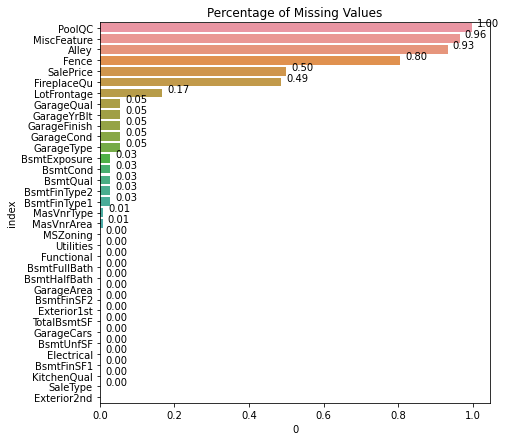

In [ ]:
# 遺漏率繪圖
fig,ax=plt.subplots(figsize=(7,7))
missing = sns.barplot(x=0,y='index',data=missing_columns)
for p in missing.patches:
    missing.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.2),
                xytext=(5, 10), textcoords='offset points')
missing.set_title('Percentage of Missing Values')

In [ ]:
# 移除遺漏值太多或分布太奇怪的欄位
data_all=data_all.drop(columns=['Heating', 'RoofMatl', 'Condition2', 'Utilities', 'Street', 'PoolQC', 'MiscFeature', 'Alley', 'Fence'],
axis=1)
missing_cat=['FireplaceQu','GarageCond','GarageType','GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType','Electrical','MSZoning','Functional','Exterior1st','KitchenQual','Exterior2nd','SaleType']
missing_num=['LotFrontage','MasVnrArea','BsmtFullBath','BsmtHalfBath','TotalBsmtSF','GarageArea','BsmtUnfSF','BsmtFinSF2','GarageCars','BsmtFinSF1']
# 類別補none
for i in missing_cat:
    data_all[i]=data_all[i].fillna('none')
# 數值補0    
for i in missing_num:
    data_all[i]=data_all[i].fillna(0)
# 建造年補中位數
data_all['GarageYrBlt']=data_all['GarageYrBlt'].fillna(data_all['GarageYrBlt'].median())

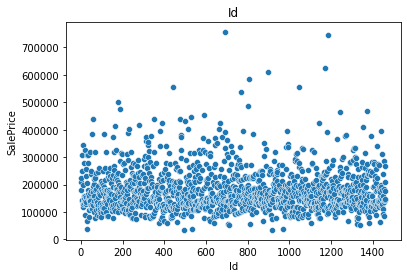

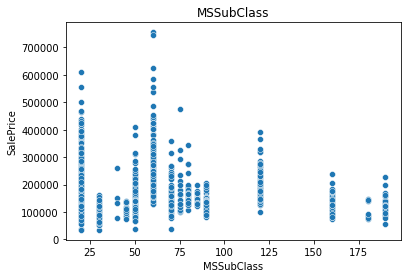

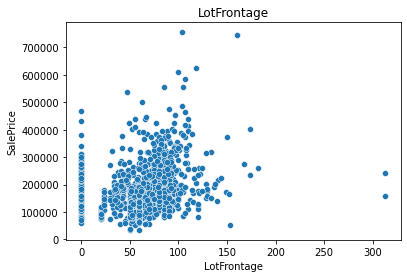

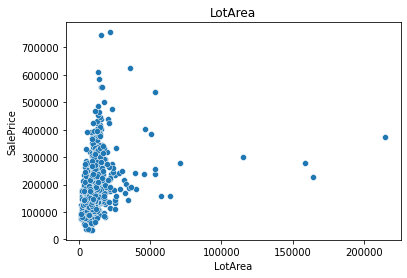

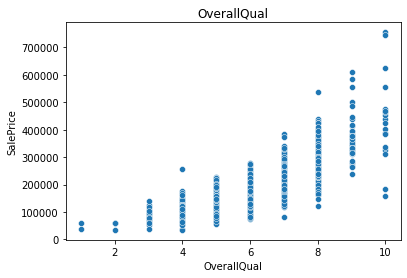

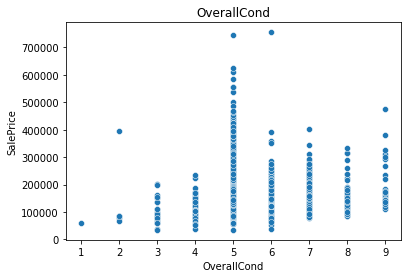

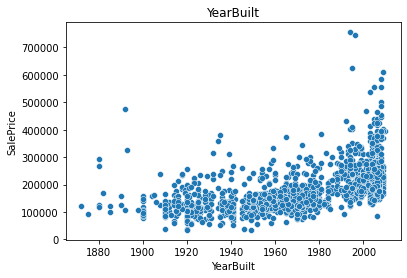

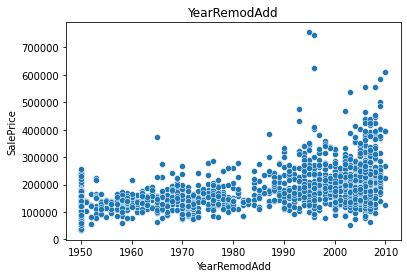

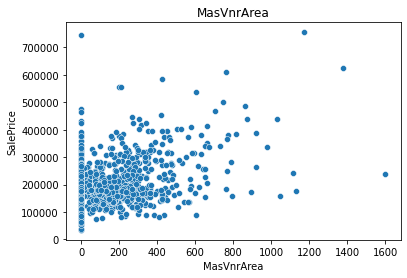

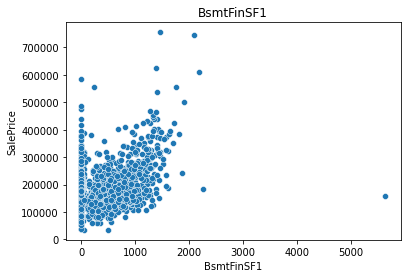

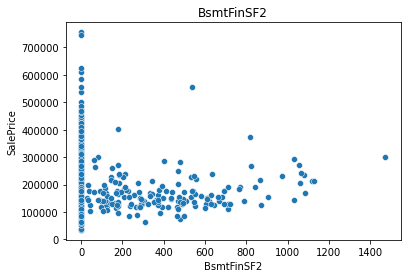

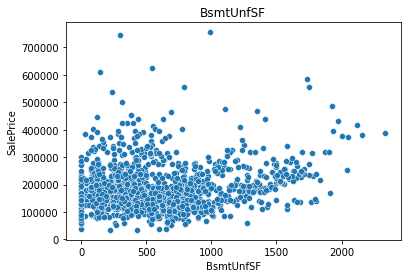

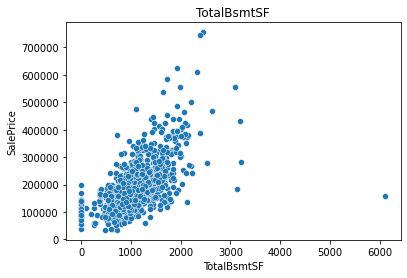

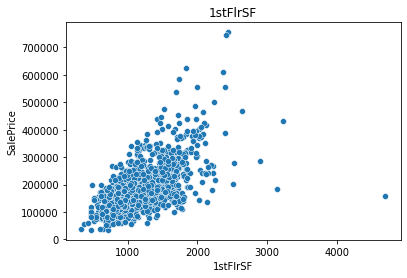

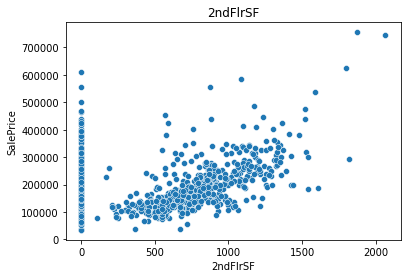

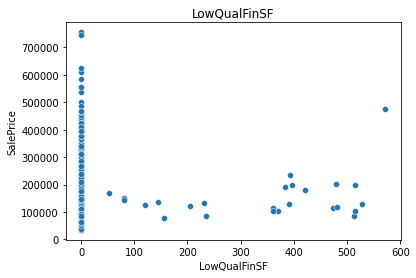

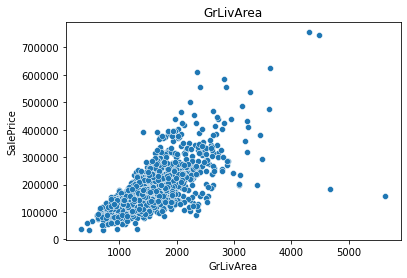

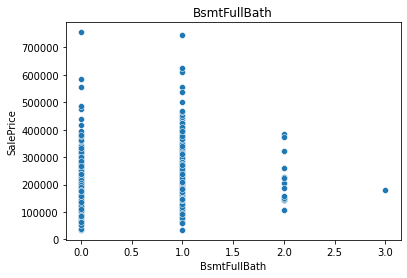

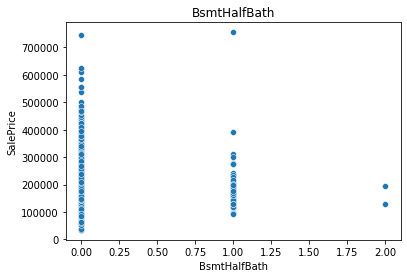

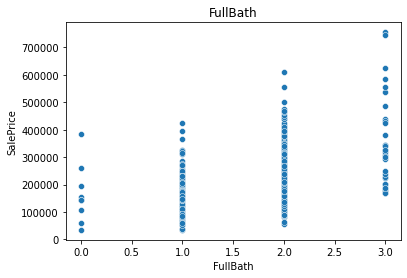

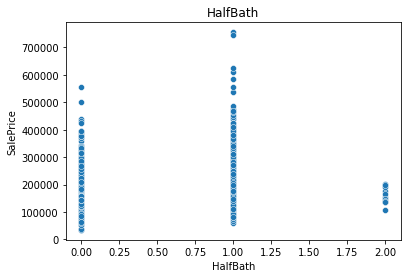

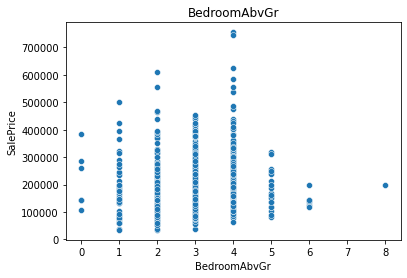

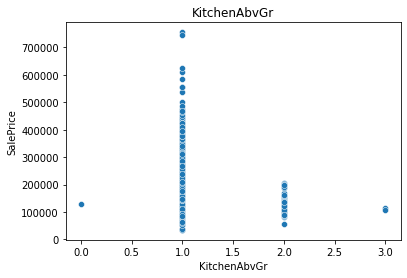

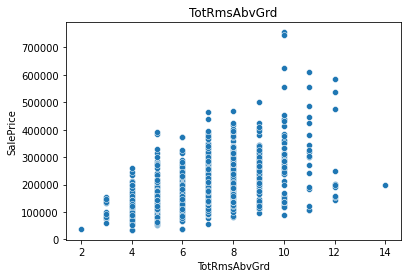

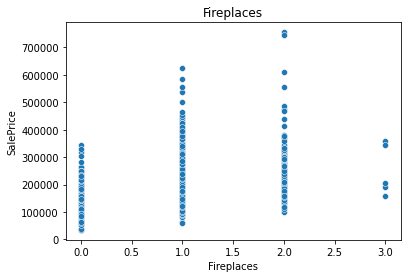

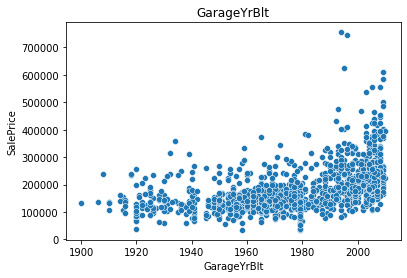

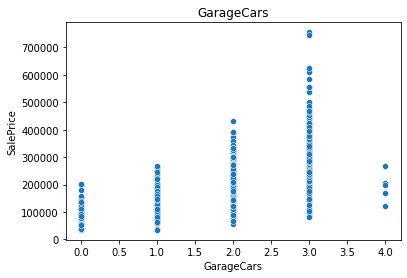

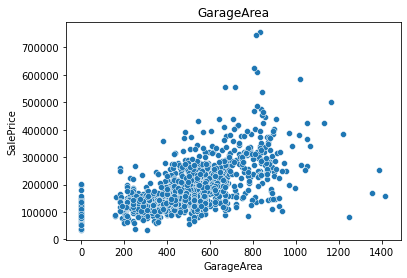

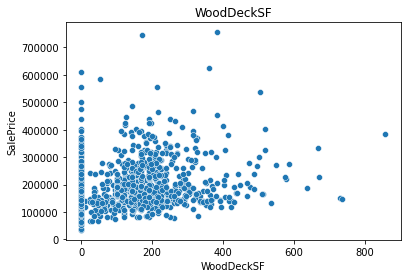

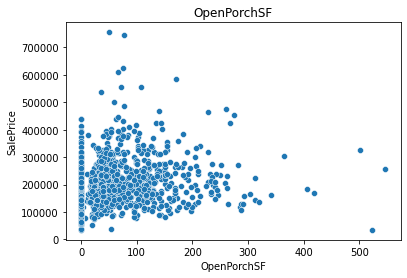

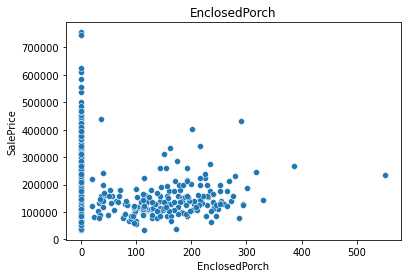

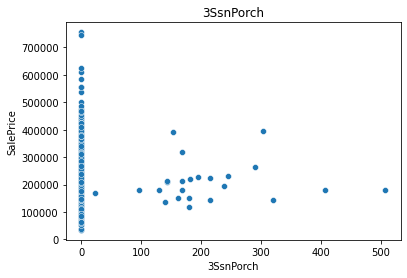

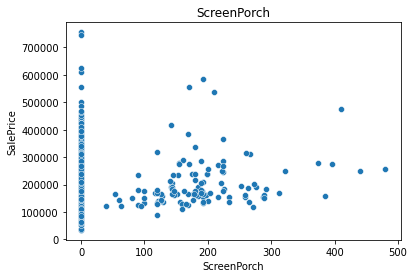

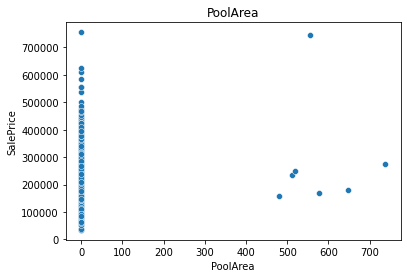

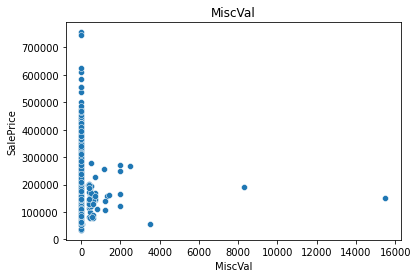

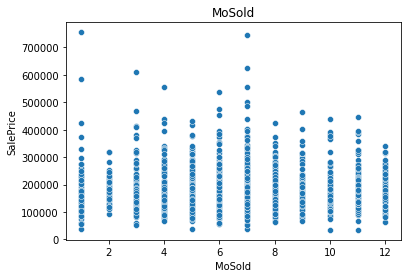

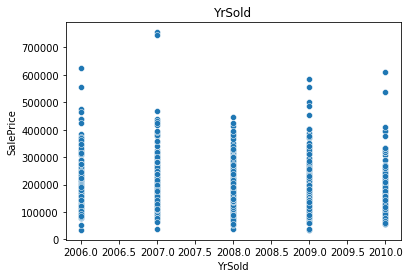

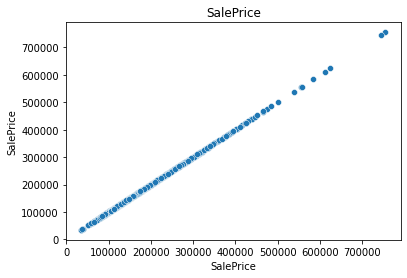

In [ ]:
# 檢查連續變項跟依變數的分布情形
data_remove_outlier=data_all[:1460]
for c in num_train:
    sns.scatterplot(x=c, y="SalePrice", data=data_remove_outlier).set_title(c,fontsize=12,color='Black')
    plt.show()

In [ ]:
outlier_columns=['LotFrontage','MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF', 'GrLivArea','BedroomAbvGr','TotRmsAbvGrd', 'MiscVal']
outlier_threshold=[300, 1400, 5000, 6000, 4000, 4500, 8, 14, 8000]
for c,n in zip(outlier_columns,outlier_threshold):
    data_remove_outlier=data_remove_outlier[data_remove_outlier[c]<n]
data_all = pd.concat((data_remove_outlier, data_all[1460:]), sort=False).reset_index(drop=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


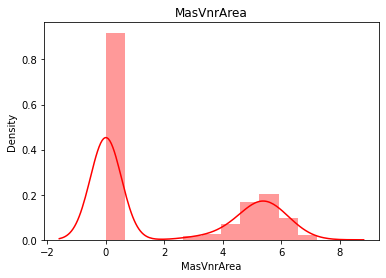

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


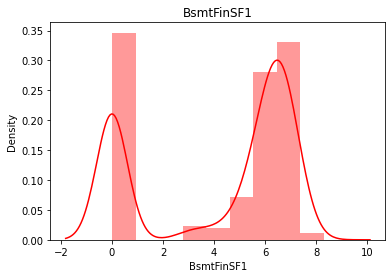

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


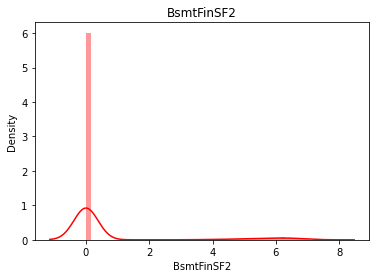

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


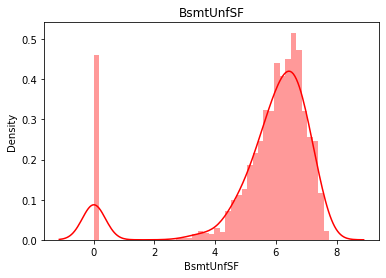

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


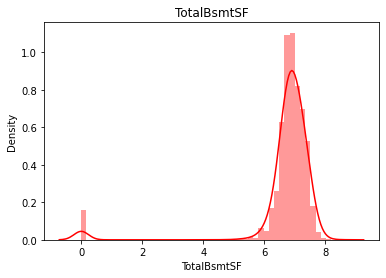

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


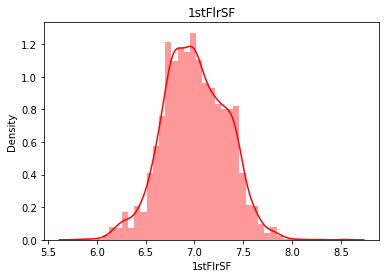

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


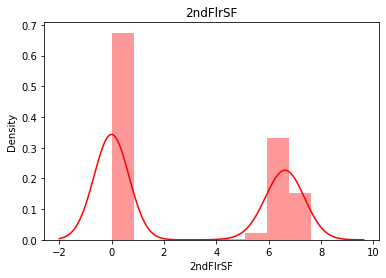

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


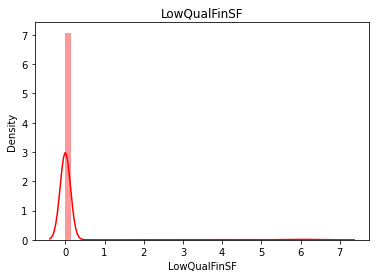

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


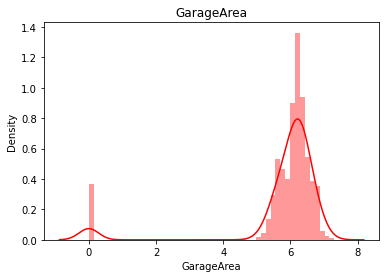

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


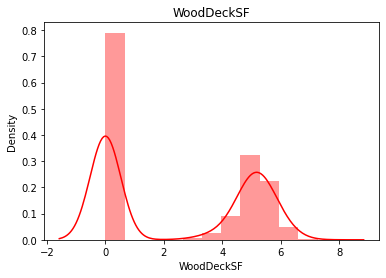

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


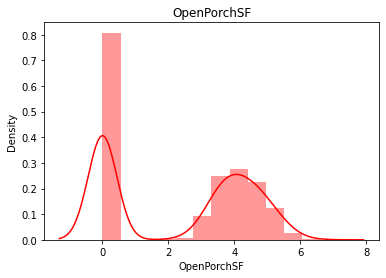

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


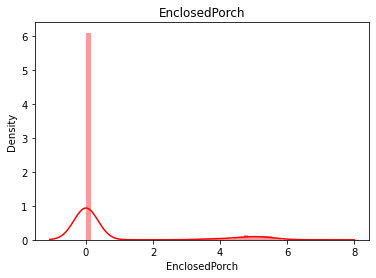

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


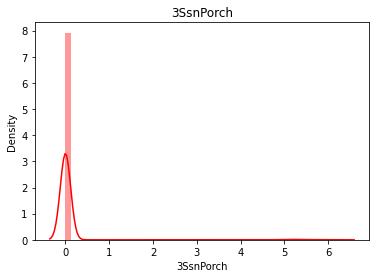

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


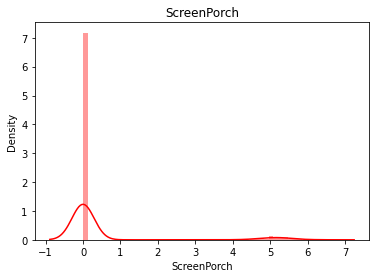

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


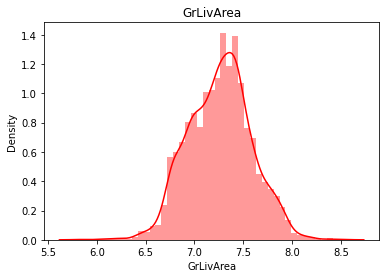

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


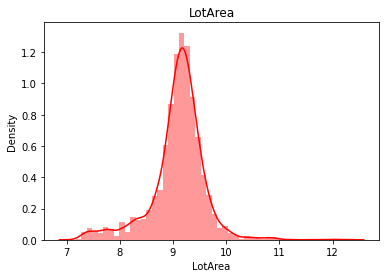

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


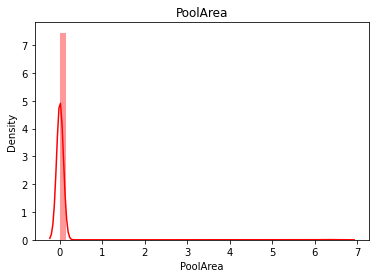

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


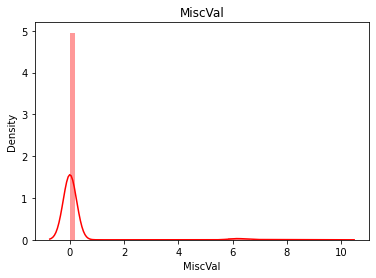

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


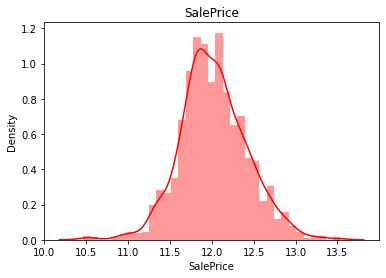

In [ ]:
# 面積相關欄位_對數轉換
for i in list(['MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
               '1stFlrSF','2ndFlrSF','LowQualFinSF','GarageArea','WoodDeckSF',
               'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','GrLivArea',
               'LotArea','PoolArea','MiscVal','SalePrice']):
    data_all[i]=(np.log1p(data_all[i].dropna()))
# check result
for i in list(['MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
               '1stFlrSF','2ndFlrSF','LowQualFinSF','GarageArea','WoodDeckSF',
               'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','GrLivArea',
               'LotArea','PoolArea','MiscVal','SalePrice']):
    sns.distplot(data_all[i].dropna(),color='red').set_title(i)
    plt.show()

In [ ]:
# 問卷量表題項目_類別轉尺度
for i in ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu',
          'GarageQual','GarageCond']:
    data_all[i]=data_all[i].replace(['Ex','Gd','TA','Fa','Po', 'none'], [5, 4, 3, 2, 1, 0]).astype(int)
    
for i in ['BsmtExposure']:
    data_all[i]=data_all[i].replace(['Gd','Av','Mn','No', 'none'], [4, 3, 2, 1, 0]).astype(int)
    
for i in ['BsmtFinType1','BsmtFinType2']:
    data_all[i]=data_all[i].replace(['GLQ','ALQ','BLQ','Rec', 'LwQ','Unf','none'], [6, 5, 4, 3, 2, 1, 0]).astype(int)

In [ ]:
# 銷售時屋齡
data_all['House_year']=data_all['YrSold']-data_all['YearBuilt']
# 銷售時屋齡(整修)
data_all['Remod_year']=data_all['YrSold']-data_all['YearRemodAdd']
# 幾年前建造車庫
data_all['Garage_built']=data_all['YrSold']-data_all['GarageYrBlt']

In [ ]:
# 年月份、MSSubClass轉類別
for i in ['YrSold','MSSubClass','MoSold']:
    data_all[i]=data_all[i].astype(str)

In [ ]:
# one hot encoding
data_final=pd.get_dummies(data_all)
data_final=data_final.drop(['Id'],axis=1).reset_index(drop=True)
# split train and validate data
x = data_final[:1453].drop('SalePrice', axis=1)  #na is the number of rows of the original training set
y=np.array(np.log1p(data_remove_outlier['SalePrice']))
Test = data_final[1453:].drop('SalePrice', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = .3, random_state=321)

第六步：單一模型建模
接下來終於要開始建模啦！我們會先建立5個單一的模型，之後再將這5個模型拿來做集成學習，本次的問題是回歸問題，這裡選擇了3個Regularized Regression家族的模型(Ridge、Lasso、ElasticNet)，以及2個近年超紅的梯度提升學習器(XGboost、LightGBM)來做基礎模型。
首先來處理Regularized Regression家族的三個模型，相較於XGBoost、LightGBM，這3個模型的調參較單純，直接用sklearn的RidgeCV、LassoCV、ElasticNetCV這幾個交叉驗證function來找出最佳超參數，程式碼如下：


1.   Ridge Regression




In [ ]:
from sklearn.linear_model import RidgeCV
# set cross-validation alpha
alpha=[0.0001,0.001,0.01,0.1,1,10,100]
# find the best alpha and build model
Ridge = RidgeCV(cv=5, alphas=alpha,normalize=True)
Ridge_fit=Ridge.fit(x_train,y_train)
y_ridge_train=Ridge_fit.predict(x_train)
y_ridge_test=Ridge_fit.predict(x_test)
# validation( train data and validate data)
print('RMSE_train_Ridge = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_ridge_train))))
print('RMSE_test_Ridge = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_ridge_test))))

RMSE_train_Ridge = 0.09573968261576198
RMSE_test_Ridge = 0.1169750299134618


2. Lasso Regression

In [ ]:
from sklearn.linear_model import LassoCV
# set cross-validation alpha
alpha=[0.0001,0.001,0.01,0.1,1,10,100]
# find the best alpha and build model
Lasso = LassoCV(cv=5, alphas=alpha,normalize=True)
Lasso_fit=Lasso.fit(x_train,y_train)
y_lasso_train=Lasso_fit.predict(x_train)
y_lasso_test=Lasso_fit.predict(x_test)
# validation( train data and validate data)
print('RMSE_train_Lasso = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_lasso_train))))
print('RMSE_test_Lasso = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_lasso_test))))

RMSE_train_Lasso = 0.10153609532527076
RMSE_test_Lasso = 0.11054838867336636


3. ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNetCV
# set cross-validation alpha and l1ratio
alpha=[0.0001,0.001,0.01,0.1,1,10,100]
l1ratio = [0.1, 0.5, 0.9, 0.95, 0.99, 1]
# find the best alpha/l1ratio and build model
elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alpha,  l1_ratio=l1ratio,normalize=True)
elastic_fit = elastic_cv.fit(x_train, y_train)
y_el_train=elastic_fit.predict(x_train)
y_el_test=elastic_fit.predict(x_test)
# validation( train data and validate data)
print('RMSE_train_ElasticNet = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_el_train))))
print('RMSE_test_ElasticNet = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_el_test))))

RMSE_train_ElasticNet = 0.10153609532527076
RMSE_test_ElasticNet = 0.11054838867336636


4. LightGBM

In [ ]:
from lightgbm import LGBMRegressor
estimator=LGBMRegressor()
parameter_grid={
        'max_depth':range(2,5,1),
        'learning_rate':np.linspace(0.001,1,20),
        'feature_fraction':np.linspace(0.5,0.99,20),
        'bagging_fraction':np.linspace(0.1,0.99,20),
        'bagging_frequency':range(5,10,1),
        'num_leaves':range(100,200,5),
        'min_data_in_leaf':range(50,200,10),
        'n_estimators':range(100,5000,100)}
grid = RandomizedSearchCV(estimator,parameter_grid,cv = 3,scoring = 'neg_root_mean_squared_error',n_iter=500,n_jobs = -1)
grid.fit(x_train, y_train)
# print best parameter combination
print (grid.best_params_)

{'num_leaves': 175, 'n_estimators': 300, 'min_data_in_leaf': 50, 'max_depth': 2, 'learning_rate': 0.05357894736842105, 'feature_fraction': 0.6547368421052632, 'bagging_frequency': 7, 'bagging_fraction': 0.3342105263157895}


In [ ]:
from lightgbm import LGBMRegressor
lightgbm = LGBMRegressor(objective='regression', 
                         num_leaves=5,
                         min_data_in_leaf= 20,
                         min_sum_hessian_in_leaf = 11,
                         reg_alpha =0.5,
                         reg_lambda =1,
                         learning_rate=0.05,
                         n_estimators=1000,
                         max_bin=55, 
                         metric="rmse",
                         max_depth =3,
                         bagging_fraction=0.8,
                         bagging_freq=5,
                         bagging_seed=9,
                         feature_fraction=0.2,
                         feature_fraction_seed=7,
                         verbose=-1)
lgbm_fit = lightgbm.fit(x_train, y_train)
y_lgbm_train=lgbm_fit.predict(x_train)
y_lgbm_test=lgbm_fit.predict(x_test)
print('RMSE_train_LGBM = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_lgbm_train))))
print('RMSE_test_LGBM = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_lgbm_test))))

RMSE_train_LGBM = 0.07687674184967995
RMSE_test_LGBM = 0.11599397727003528


5. XGboost

In [ ]:
from xgboost.sklearn import XGBRegressor
estimator=XGBRegressor()
parameter_grid={
        'max_depth':range(2,5,1),
        'learning_rate':np.linspace(0.001,1,20),
        'colsample_bytree':np.linspace(0.1,0.99,20),
        'num_leaves':range(100,200,5),
        'n_estimators':range(100,5000,100)}
grid = RandomizedSearchCV(estimator,parameter_grid,cv = 5,scoring = 'neg_root_mean_squared_error',n_iter=500,n_jobs = -1)
grid.fit(x_train, y_train)
# print best parameter combination
print (grid.best_params_)

In [ ]:
from xgboost.sklearn import XGBRegressor
xgb= XGBRegressor(base_score=0.5, 
                  booster='gbtree', 
                  colsample_bylevel=1,
                  colsample_bynode=1, 
                  colsample_bytree=0.7, 
                  gamma=0,
                  importance_type='gain', 
                  learning_rate=0.01,
                  max_delta_step=0,
                  max_depth=3, 
                  min_child_weight=0, 
                  missing=None, 
                  n_estimators=1000,
                  n_jobs=1, 
                  nthread=None, 
                  objective='reg:squarederror', 
                  random_state=0,
                  reg_alpha=1, 
                  reg_lambda=1, 
                  scale_pos_weight=1, 
                  seed=None,
                  silent=None, 
                  subsample=1, 
                  verbosity=1)
xgb_fit = xgb.fit(x_train, y_train)
y_xgb_train=xgb_fit.predict(x_train)
y_xgb_test=xgb_fit.predict(x_test)
print('RMSE_train_XGB = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_xgb_train))))
print('RMSE_test_XGB = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_xgb_test))))

RMSE_train_XGB = 0.0924233288949549
RMSE_test_XGB = 0.13066358988759463


### **第七步：Voting、Stacking、Blending**

1.Voting: 這邊使用sklearn.ensemble的VotingRegressor來建立集成模型，使用方式也超級簡單，直接把5個模型丟進去就好了：

In [ ]:
from sklearn.ensemble import VotingRegressor
# Build Model
vote_mod = VotingRegressor([('Ridge', Ridge_fit), 
                            ('Lasso', Lasso_fit), 
                            ('Elastic', elastic_fit), 
                            ('lgbm', lgbm_fit),
                            ('xgb',xgb_fit)])
vote = vote_mod.fit(x_train, y_train.ravel())
# predict train/test y
vote_pred_train=vote.predict(x_train)
vote_pred_test=vote.predict(x_test)
# validation( train data and validate data)
print('RMSE_train_Voting = ' + str(math.sqrt(sklm.mean_squared_error(y_train, vote_pred_train))))
print('RMSE_test_Voting = ' + str(math.sqrt(sklm.mean_squared_error(y_test, vote_pred_test))))


RMSE_train_Voting = 0.08820399200240127
RMSE_test_Voting = 0.11012604696638799


很明顯地效果比單一模型要有所改善。

2. Stacking:
Stacking相對於Voting來說，原理較複雜，相關理論跟應用可以參閱這裡(簡易)跟這裡(較完整)，建議有空可以了解一下。
我們這邊使用mlxtend.regressor的StackingRegressor來進行集成，模型則選用GBDT，程式碼如下：

In [ ]:
from mlxtend.regressor import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Build Model
gbdt=GradientBoostingRegressor(learning_rate=0.05,
                               max_leaf_nodes=3,
                              n_estimators=100)
stregr = StackingRegressor(regressors=[Ridge_fit, Lasso_fit, elastic_fit, lgbm_fit,xgb_fit], 
                           meta_regressor=gbdt, 
                           use_features_in_secondary=True)
stack_mod=stregr.fit(x_train, y_train.ravel())
# predict train/test y
stacking_pred_train=stack_mod.predict(x_train)
stacking_pred_test=stack_mod.predict(x_test)
# validation( train data and validate data)
print('RMSE_train_Stacking = ' + str(math.sqrt(sklm.mean_squared_error(y_train, stacking_pred_train))))
print('RMSE_test_Stacking = ' + str(math.sqrt(sklm.mean_squared_error(y_test, stacking_pred_test))))

RMSE_train_Stacking = 0.0701781734748633
RMSE_test_Stacking = 0.11723752253736111


效果看來….一般般，相較於Voting的結果，over fitting的情況也較嚴重，原因可能是參數調整的問題，這個之後有時間還可以優化，但我們目前就將就著用。

3. Blending:
最後嘗試把第二層的Voting、Stacking兩個模型用Blending的方式結合，嘗試找出最佳混和權重：


In [ ]:
# set weight list
weight=list(np.linspace(0.1,1,91))
# create outcome dataframe 
train_mse=[]
test_mse=[]
for i in weight:
    blending_pred_train=(i*vote_pred_train)+((1-i)*stacking_pred_train)
    blending_pred_test=(i*vote_pred_test)+((1-i)*stacking_pred_test)
    train_mse.append(math.sqrt(sklm.mean_squared_error(y_train, blending_pred_train)))
    test_mse.append(math.sqrt(sklm.mean_squared_error(y_test, blending_pred_test)))
blending_output=pd.DataFrame({'weight':weight,
                              'train_mse':train_mse,
                              'test_mse':test_mse})
# print top 10 weight value
print (blending_output.sort_values(by=['test_mse'],ascending=True).head(10))

    weight  train_mse  test_mse
83    0.93   0.086498  0.110089
84    0.94   0.086739  0.110089
82    0.92   0.086259  0.110091
85    0.95   0.086980  0.110091
81    0.91   0.086020  0.110094
86    0.96   0.087223  0.110095
80    0.90   0.085783  0.110099
87    0.97   0.087467  0.110100
79    0.89   0.085547  0.110105
88    0.98   0.087711  0.110107


### **第八步：Submit Predict Data**
最後一步就是把提交用的預測資料集拿來用最後的模型進行預測：

In [ ]:
# predict and blending
final_pred_voting=vote.predict(Test)
final_pred_stacking=stack_mod.predict(Test)
final_pred_blending=0.93*final_pred_voting+0.07*final_pred_stacking
# reverse log y
final_pred_blending=np.expm1(final_pred_blending)
a=list(range(1461,2920,1))
submit=pd.DataFrame({'Id':list(range(1461,2920,1)),
                     'SalePrice':final_pred_blending})
    
# save as csv     
submit.to_csv('submit.csv',index=False)